In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('data/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [72]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [73]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [75]:
columns = ["Group", "Age", "Visit", "M/F", "Hand", "EDUC"]
for column in columns:
    print(column, df[column].unique())

Group ['Nondemented' 'Demented' 'Converted']
Age [87 88 75 76 80 90 83 85 71 73 93 95 68 69 66 78 81 82 77 86 92 84 72 61
 64 74 60 62 91 79 89 70 94 97 65 67 63 96 98]
Visit [1 2 3 4 5]
M/F ['M' 'F']
Hand ['R']
EDUC [14 12 18 16  8 20 13  6 17 15 23 11]


In [76]:
#reduce the number of groups to Demented and Non-Demented
df["Group"] = df["Group"].replace(['Converted'], ['Demented'])

'''
Hand has only one unique value, all values of MRI ID and SUBJECT ID are unique, and visit is uncessary
Hence we can drop all of those columns
'''
df.drop(["Subject ID","MRI ID", "Visit", "Hand"], axis=1, inplace=True)
df.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [77]:
df["Group"].value_counts()

Nondemented    190
Demented       183
Name: Group, dtype: int64

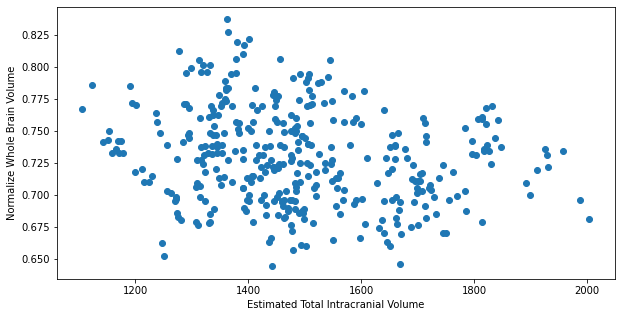

In [78]:
#plot showing the realtionship between Estimated Total Intracranial Volume and Normalize Whole Brain Volume
plt.figure(figsize=(10,5))
plt.scatter(df["eTIV"], df["nWBV"])
plt.xlabel("Estimated Total Intracranial Volume")
plt.ylabel("Normalize Whole Brain Volume")
plt.show()

The relationship is a negative correlation

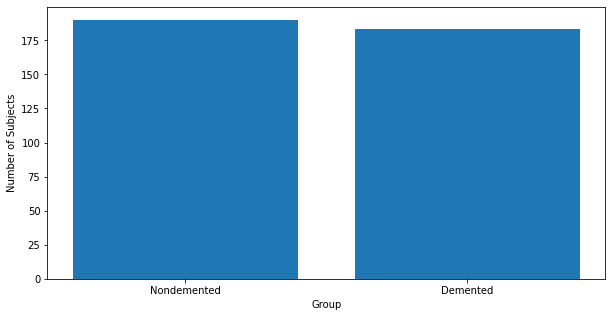

In [79]:
#bar plot for dimentia group
plt.figure(figsize=(10,5))
plt.bar(df["Group"].unique(), df["Group"].value_counts())
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.show()

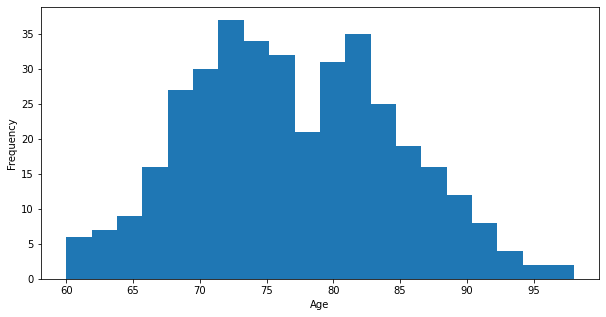

In [80]:
#histogram for age
plt.figure(figsize=(10,5))
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The age distribution ranges from 60 to 100 years

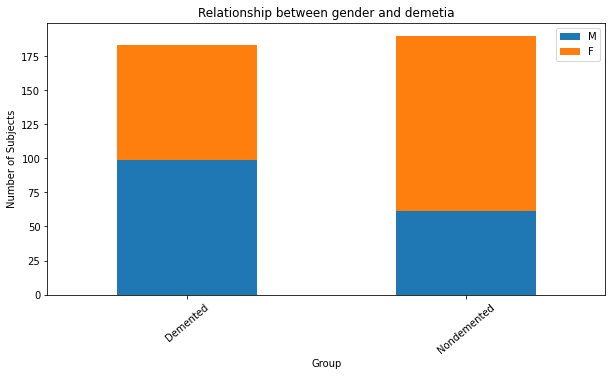

In [81]:
#plot to show the relationship between gender and dimentia
demented = df[df["Group"]=="Demented"]["M/F"].value_counts()
nondemented = df[df["Group"]=="Nondemented"]["M/F"].value_counts()

group_df = pd.DataFrame([demented, nondemented])
group_df.index = ["Demented", "Nondemented"]
group_df.plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.title("Relationship between gender and demetia")
plt.xticks(rotation=40)
plt.show()



The chart shows men are more likely to have dimentia

In [82]:
import seaborn as sns

def facet_grid(feature):
    facet = sns.FacetGrid(df, hue="Group", aspect=3)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, df[feature].max()))
    facet.add_legend()


(50.0, 98.0)

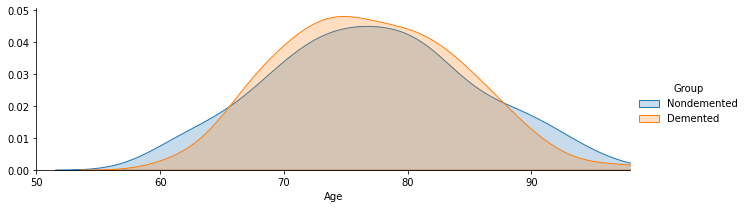

In [83]:
facet_grid("Age")
plt.xlim(df["Age"].min()-10,df["Age"].max())

People with dementia are usually between 70 and 80 years

(0.876, 1.587)

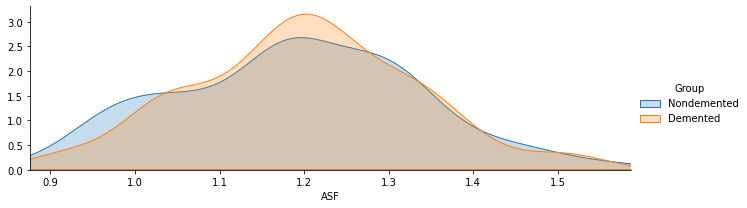

In [84]:
facet_grid("ASF")
plt.xlim(df["ASF"].min(),df["ASF"].max())

(0.644, 0.837)

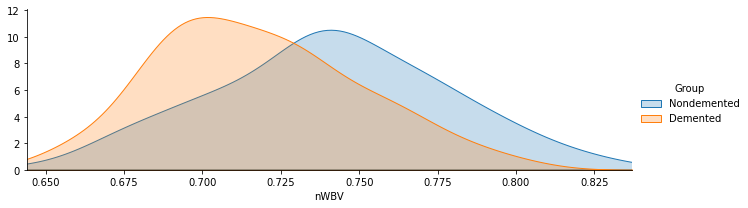

In [85]:
facet_grid("nWBV")
plt.xlim(df["nWBV"].min(),df["nWBV"].max())

People  with dementia are usually  less educated

(6.0, 23.0)

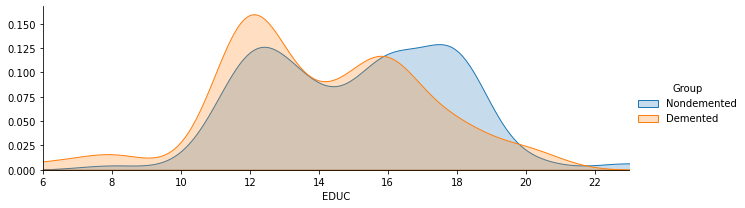

In [86]:
facet_grid("EDUC")
plt.xlim(df["EDUC"].min(),df["EDUC"].max())

In [87]:
#check for null values
df.isnull().sum()


Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [88]:
df = df.dropna(axis=0)
df.isnull().sum()

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [89]:
#check for group balance
df["Group"].value_counts()

Nondemented    190
Demented       164
Name: Group, dtype: int64

In [90]:
df["Group"] = np.where(df["Group"] == "Demented", 1, 0)
df["M/F"] = np.where(df["M/F"] == "M", 1, 0)
df.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [91]:
X = df.drop(columns=["Group"], axis=1)
y = df["Group"]

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
#train logistic regression model with a list of c values to obtain the best c value

c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c:
    logreg = LogisticRegression(C=c, random_state=42)
    logreg.fit(X_train_scaled, y_train)
    y_pred = logreg.predict(X_test_scaled)
    print("Accuracy for c = ", c, ": ", accuracy_score(y_test, y_pred))

Accuracy for c =  0.001 :  0.5514018691588785
Accuracy for c =  0.01 :  0.6542056074766355
Accuracy for c =  0.1 :  0.8317757009345794
Accuracy for c =  1 :  0.9065420560747663
Accuracy for c =  10 :  0.9158878504672897
Accuracy for c =  100 :  0.9158878504672897
Accuracy for c =  1000 :  0.9065420560747663


In [95]:
#perform cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores_array = []
for c in c:
    logreg = LogisticRegression(C=c, random_state=42)
    scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores_array.append(scores.mean())
    print("Accuracy for c = ", c, ": ", scores.mean())


Accuracy for c =  0.001 :  0.5303673469387756
Accuracy for c =  0.01 :  0.5750204081632653
Accuracy for c =  0.1 :  0.813469387755102
Accuracy for c =  1 :  0.9311836734693877
Accuracy for c =  10 :  0.9553469387755102
Accuracy for c =  100 :  0.9512653061224491
Accuracy for c =  1000 :  0.9471836734693877


C:\Users\Russell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


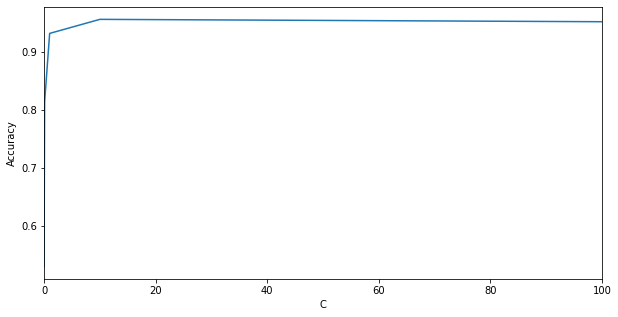

In [96]:
#plot the accuracy score for each c value
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.figure(figsize=(10,5))
plt.plot(c, scores_array)
plt.xlabel("C")
plt.xlim(0,100)
plt.ylabel("Accuracy")
plt.show()

c=10 is the best value since accuracy begins to reduce for higher regularization values

In [97]:
#train logistic regression model with c to be 10 and generate confusion matrix
logreg = LogisticRegression(C=10, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy for c = 10: ", accuracy_score(y_test, y_pred))
print("Report: ", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy for c = 10:  0.9158878504672897
Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.95      0.85      0.90        48

    accuracy                           0.92       107
   macro avg       0.92      0.91      0.91       107
weighted avg       0.92      0.92      0.92       107

[[57  2]
 [ 7 41]]


In [98]:
#training data with Decision Tree Classifier
maximun_depths = [1,2,3,4,5,6,7,8,9,10]
scores_array = []
for max_depth in maximun_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores_array.append(scores.mean())
    print("Accuracy for max_depth = ", max_depth, ": ", scores.mean())

Accuracy for max_depth =  1 :  0.9553469387755102
Accuracy for max_depth =  2 :  0.9553469387755102
Accuracy for max_depth =  3 :  0.9553469387755102
Accuracy for max_depth =  4 :  0.9434285714285714
Accuracy for max_depth =  5 :  0.9431836734693878
Accuracy for max_depth =  6 :  0.9473469387755102
Accuracy for max_depth =  7 :  0.9473469387755102
Accuracy for max_depth =  8 :  0.9433469387755103
Accuracy for max_depth =  9 :  0.9351836734693878
Accuracy for max_depth =  10 :  0.9351836734693878


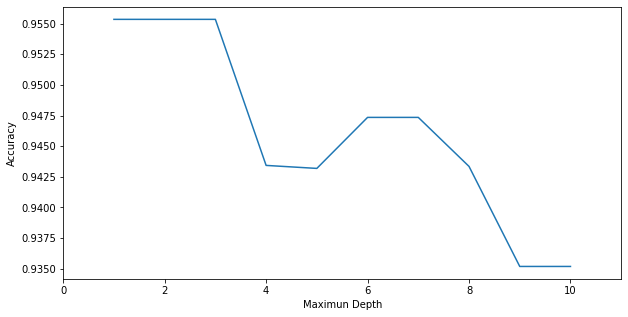

In [99]:
#plot the accuracy score for each max_depth
maximun_depths = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,5))
plt.plot(maximun_depths, scores_array)
plt.xlabel("Maximun Depth")
plt.xlim(0,11)
plt.ylabel("Accuracy")
plt.show()  


a maximum depth of 3 can be taken as the optimal value

In [100]:
#train decision tree classifier with max_depth = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print("Accuracy for max_depth = 3: ", accuracy_score(y_test, y_pred))
print("Report: ", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy for max_depth = 3:  0.9158878504672897
Report:                precision    recall  f1-score   support

           0       0.89      0.97      0.93        59
           1       0.95      0.85      0.90        48

    accuracy                           0.92       107
   macro avg       0.92      0.91      0.91       107
weighted avg       0.92      0.92      0.92       107

[[57  2]
 [ 7 41]]


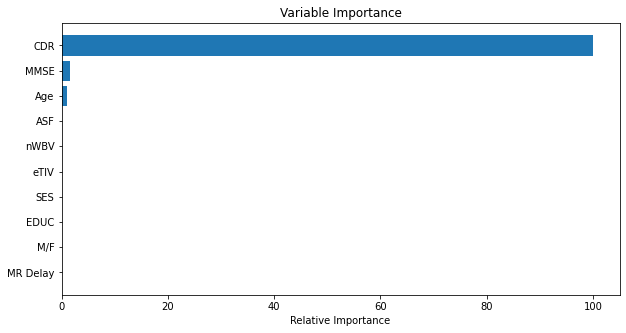

['MR Delay' 'M/F' 'EDUC' 'SES' 'eTIV' 'nWBV' 'ASF' 'Age' 'MMSE' 'CDR']


In [105]:
#feature importance
feature_importance = dt.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()
print(np.array(X.columns[sorted_idx]))
